In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df = pd.read_csv("../../dataset/IRIS.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df['species'].head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [9]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

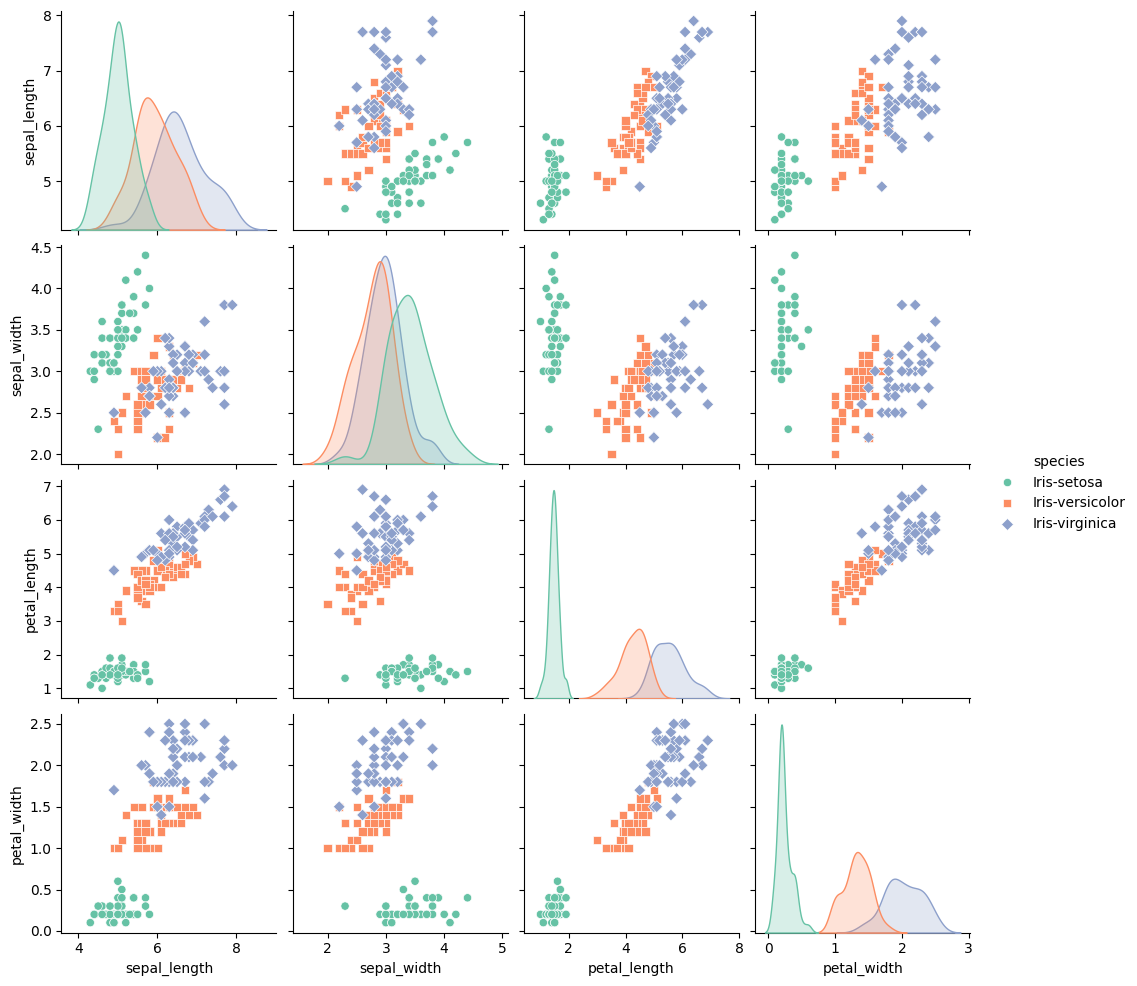

In [14]:
# for the data visualization , using seaborn library to visualize the data
# set the size of the plot
plt.figure(figsize=(10, 6))
sns.pairplot(df, hue='species', palette='Set2', diag_kind='kde', markers=['o', 's', 'D'])

plt.show()

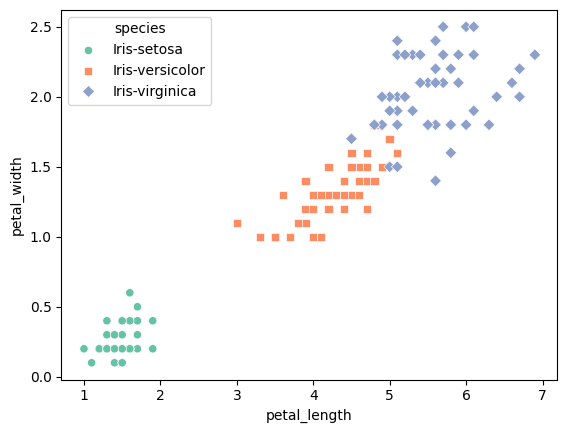

In [18]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species', palette='Set2', style='species', markers=['o', 's', 'D'])
plt.show()

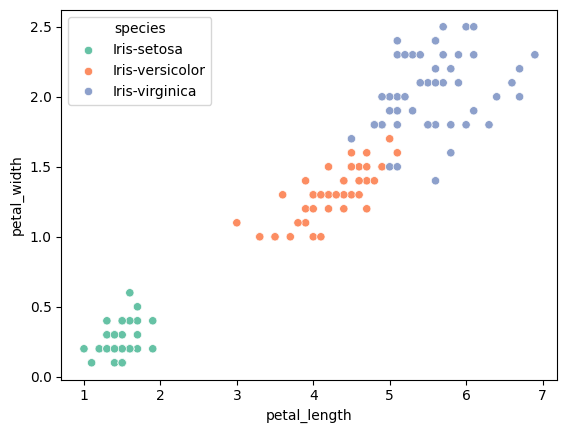

In [44]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species', palette='Set2')
plt.show()

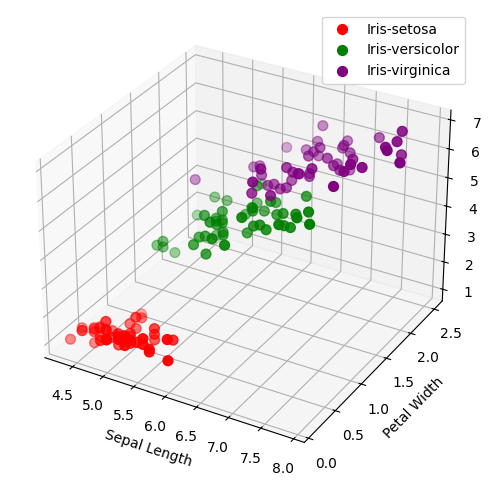

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')

# Plot each species separately with different colors
for species, color in zip(df['species'].unique(), ['red', 'green', 'purple']):
    subset = df[df['species'] == species]
    
    ax.scatter(
        subset['sepal_length'],
        subset['petal_width'],
        subset['petal_length'],
        color=color,
        label=species,
        s=50
    )

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Petal Width')
ax.set_zlabel('Petal Length')

ax.legend()
plt.show()


In [47]:
# using label encoder for the species column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder();
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Now training and spliting the data in systematic order


In [52]:
x = df.drop('species', axis=1)
y = df['species']


In [91]:
# spliting the data for the training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=7)

In [76]:
# manually data for testing the model
manual_data = np.array([[5.1, 3.5, 1.4, 0.2], [6.2, 3.4, 5.4, 2.3]])

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

pred = model.predict(x_test)
pred1 = model.predict(manual_data)

print("Manual Data Predictions:", pred1)

print("Accuracy:", accuracy_score(y_test, pred))


Manual Data Predictions: [0 2]
Accuracy: 0.8666666666666667


c:\Users\yadav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [93]:
# now using another model for the classification which is the KNN (kNearest Neighbors) model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)
knn_pred1 = knn_model.predict(manual_data)
print("Manual Data Predictions (KNN):", knn_pred1)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))

Manual Data Predictions (KNN): [0 2]
KNN Accuracy: 0.9


c:\Users\yadav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [103]:
# using another model for the classification which is the Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier(random_state=17, max_depth=2)
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)
dt_pred1 = dt_model.predict(manual_data)
print("Manual Data Predictions (Decision Tree):", dt_pred1)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

Manual Data Predictions (Decision Tree): [0 2]
Decision Tree Accuracy: 0.8666666666666667


c:\Users\yadav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
